In [ ]:
import numpy as np
import os
import numpy as np
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt


# Data

In [ ]:
# Set path
drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "COMP562"
GOOGLE_DRIVE_PATH = os.path.join("/content/drive/My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

TRAINING_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'train_data_np.npy')
VALIDATION_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'val_data_np.npy')
TEST_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'test_data_np.npy')

TRAINING_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'train_labels_np.npy')
VALIDATION_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'val_labels_np.npy')
TEST_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'test_labels_np.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
train_data = np.load(TRAINING_DATASET_PATH)
val_data = np.load(VALIDATION_DATASET_PATH)
test_data = np.load(TEST_DATASET_PATH)

# Load labels
train_labels = np.load(TRAINING_LABELS_PATH)
val_labels = np.load(VALIDATION_LABELS_PATH)
test_labels = np.load(TEST_LABELS_PATH)

# Initial the Random Forests Model & Train the Model

In [ ]:
# Flatten the image data
num_samples, channels, height, width = train_data.shape
train_data_flattened = train_data.reshape((num_samples, channels * height * width))
val_data_flattened = val_data.reshape((val_data.shape[0], channels * height * width))
test_data_flattened = test_data.reshape((test_data.shape[0], channels * height * width))


X_train, y_train = train_data_flattened, train_labels
X_val, y_val = val_data_flattened, val_labels
X_test, y_test = test_data_flattened, test_labels

n_estimators_values = [10, 50, 100, 150, 200]
accuracies = []

for n in n_estimators_values:
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the classifier on the training set
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = rf_classifier.predict(X_val)

    # Evaluate accuracy on the validation set and append to the list
    val_accuracy = accuracy_score(y_val, val_predictions)
    accuracies.append(val_accuracy)

    # Print evaluation metrics
    print("------------------------------------------------------------------------")
    print("n_estimators = ", n)
    print("Validation Accuracy:", val_accuracy)
    print("\nValidation Classification Report:\n", classification_report(y_val, val_predictions))

------------------------------------------------------------------------
n_estimators =  10
Validation Accuracy: 0.8364197530864198

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       1.00      1.00      1.00        20
           2       0.90      0.97      0.93        80
           3       1.00      0.95      0.97        80
           4       0.36      0.31      0.33        13
           5       0.27      0.30      0.29        10
           6       0.86      1.00      0.92        12
           7       0.67      0.36      0.47        11
           8       0.67      0.60      0.63        10
           9       0.31      0.40      0.35        10
          10       0.75      0.82      0.78        11
          11       0.64      0.58      0.61        24

    accuracy                           0.84       324
   macro avg       0.70      0.69      0.69       324
weighted avg       0

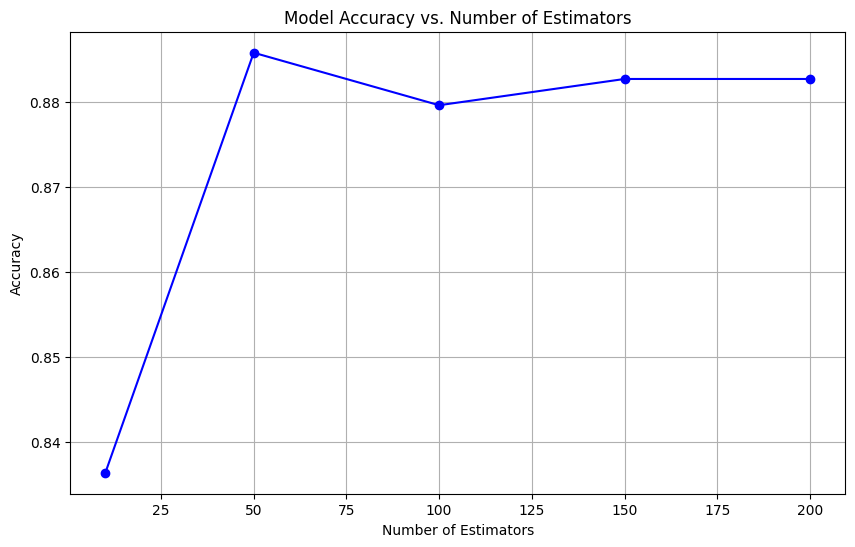

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Apply Hyperparameter & Evaluation of Best Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_val, y_val)

# Get the best parameters from GridSearch CV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new classifier using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predict on the test set
predictions = best_rf.predict(X_test)

# Evaluate the new classifier
print("Optimized Accuracy:", accuracy_score(y_test, predictions))
print("\nOptimized Classification Report:\n", classification_report(y_test, predictions))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Optimized Accuracy: 0.8978805394990366

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       1.00      1.00      1.00        29
           2       0.94      0.99      0.97       135
           3       1.00      0.96      0.98       142
           4       0.52      0.55      0.54        20
           5       0.54      0.58      0.56        12
           6       0.88      1.00      0.94        15
           7       0.67      0.62      0.64        13
           8       0.91      0.59      0.71        17
           9       0.65      0.69      0.67        16
          10       0.67      0.71      0.69        17
          11       0.77      0.79      0.78        34

    accuracy                           0.90       519
   macro avg       0.79      0.79      0.79       519
weighted avg       0.90      0.90      0.90       519

